Basic notebook setup

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.1 MB/s eta 0:00:00


In [ ]:
%load_ext google.colab.data_table

In [ ]:
 import numpy as np
 import pandas as pd
 #used to grab the stock prices, with yahoo
 from pandas_datareader import data as pdr
# import yfinance as yfin
import yfinance as yf
from datetime import datetime
# yfin.pdr_override()


# Mapping the S&P 500's corporate headquarters

The S&P 500 companies represent a diverse view of the economy. However, how diverse is the geographical spread of the companies' headquarters in the US?  



In [ ]:
sp_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp_table = sp_data[0]
sp_table

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [ ]:
# List of US states for cleaning data...
# state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "D.C.", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [ ]:
sp_table[['Headquarters Cities', 'State']] = sp_table['Headquarters Location'].str.split(',',expand=True, n=1)

In [ ]:
sp_table = sp_table.groupby('State').agg('count').reset_index()

In [ ]:
sp_table = sp_table[['State','Security']]

In [ ]:
sp_table["State"] = sp_table["State"].astype("string")

In [ ]:
sp_table.dtypes

State       string
Security     int64
dtype: object

In [ ]:
sp_table['Abbrev'] = sp_table['State'].map(us_state_abbrev)
# sp_table['Abbrev'] = sp_table.State.replace(us_state_abbrev)

In [ ]:
sp_table

,State,Security,Abbrev
0,Alabama,2,NaN
1,Arizona,9,NaN
2,Arkansas,3,NaN
3,Bermuda,2,NaN
4,"Bristol, United Kingdom",1,NaN
5,California,68,NaN
6,Canada,1,NaN
7,Colorado,6,NaN
8,Connecticut,14,NaN
9,D.C.,2,NaN


#### manually create the table

In [ ]:
from google.colab import files
sp_table.to_csv('sp_table.csv')
files.download('sp_table.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#### reinput the data
sp_table = pd.read_csv("/content/sample_data/sp_table.csv")

In [ ]:
sp_table.head()

,Unnamed: 0,State,Security,Abbrev
0,0,Alabama,2,NaN
1,1,Arizona,9,NaN
2,2,Arkansas,3,NaN
3,3,Bermuda,2,NaN
4,4,"Bristol, United Kingdom",1,NaN


In [ ]:
sp_table = sp_table[["Abbrev","Security"]]

##**Question 1: Chloropleth map and data manipulation** Optional

Create a chloropleth map of the US where:
* The color of the state is mapped to the number of companies with headquarters in that state
* Hovering over a state shows the
  * Most represented sector in the state with number of companies in that sector
  * Average age of companies in state
  * Number of companies in the state

In [ ]:
import pandas as pd
import folium

# Load SP table data
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)


url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

h = folium.Map(location=[48, -102], zoom_start=3)


# Color the choropleth by unemployment:
m.choropleth(
geo_data=state_geo,
name='choropleth',
data=sp_table,
columns=['Abbrev', 'Security'],
key_on="feature.id",
fill_color='Spectral',
fill_opacity=0.1,
line_opacity=0.1,
legend_name='Company Distribution by State'
)
folium.LayerControl().add_to(m)
# Save to html
m.save('company distribution.html')

## Question 1 answer:

# Correlation network analysis


In this assignment, you will visualize the correlation structure of the S&P 500 at two different periods in time:
* before the first case of Covid-19 (assume 1/1/2020 is the first case)
* 6 months after the first case of Covid-19
to assess covid-19's impact on the market.


## Setup Code

Run the following to setup the code necessary for the assignment.

### Setting up libraries and fetching data

In [ ]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.5 MB/s eta 0:00:00


In [ ]:
# Get the top 50 S&P 500 companies by marketcap
url = "https://raw.githubusercontent.com/datasets/s-and-p-500-companies-financials/master/data/constituents-financials.csv"
sp_table = pd.read_csv(url)

In [ ]:
sp_table

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,12915021000,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,27003303098,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,24454698119,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,10670678640,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


### Filtering the universe of stocks

To make the network analytics more tractable, we will filter the S&P 500 list down to the top 20 companies by market capitalization (essentially, the size of the company).


In [ ]:
# Create a subset by selecting the top 20 companies of the sp_table sorted by Market Cap and store in new variable called top20.
# We are actually selecting the top 21 here because one of the symbols, BRK.B Berkshire Hathaway, tends not to have data. Yes, this is hacky...
top20 = sp_table.nlargest(21,'Market Cap')
top20

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
51,AAPL,Apple Inc.,Information Technology,155.15,16.86,1.579541,9.20,180.1000,131.1200,809508034020,7.938600e+10,3.458609,5.66,http://www.sec.gov/cgi-bin/browse-edgar?action...
27,GOOGL,Alphabet Inc Class A,Information Technology,1007.71,31.48,0.000000,22.27,1198.0000,824.3000,733823966137,3.421700e+10,6.801692,4.70,http://www.sec.gov/cgi-bin/browse-edgar?action...
28,GOOG,Alphabet Inc Class C,Information Technology,1001.52,40.29,0.000000,22.27,1186.8900,803.1903,728535558140,3.271400e+10,6.772653,4.67,http://www.sec.gov/cgi-bin/browse-edgar?action...
311,MSFT,Microsoft Corp.,Information Technology,85.01,25.76,1.874791,2.97,96.0700,63.2200,689978437468,4.107900e+10,7.113097,9.49,http://www.sec.gov/cgi-bin/browse-edgar?action...
30,AMZN,Amazon.com Inc,Consumer Discretionary,1350.50,296.16,0.000000,6.16,1498.0000,812.5000,685873374731,1.613200e+10,3.927053,24.28,http://www.sec.gov/cgi-bin/browse-edgar?action...
187,FB,"Facebook, Inc.",Information Technology,171.58,27.90,0.000000,5.39,195.3200,132.4400,523423036576,2.362400e+10,13.241967,7.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
263,JPM,JPMorgan Chase & Co.,Financials,107.88,15.43,1.984584,6.30,117.3529,81.6350,386613611000,0.000000e+00,3.371499,1.60,http://www.sec.gov/cgi-bin/browse-edgar?action...
261,JNJ,Johnson & Johnson,Health Care,126.36,17.31,2.556688,0.39,148.3200,113.1500,353062464971,2.243000e+10,4.632622,4.74,http://www.sec.gov/cgi-bin/browse-edgar?action...
185,XOM,Exxon Mobil Corp.,Energy,76.07,21.37,4.003120,1.88,89.3000,76.0500,326148660000,3.905200e+10,1.770194,1.85,http://www.sec.gov/cgi-bin/browse-edgar?action...
66,BAC,Bank of America Corp,Financials,29.74,16.34,1.536000,1.55,32.6700,22.0700,321478200969,0.000000e+00,3.201187,1.24,http://www.sec.gov/cgi-bin/browse-edgar?action...


### Getting the data

In [ ]:
tickers = top20['Symbol'].to_list()
tickers

['AAPL',
 'GOOGL',
 'GOOG',
 'MSFT',
 'AMZN',
 'FB',
 'JPM',
 'JNJ',
 'XOM',
 'BAC',
 'WMT',
 'WFC',
 'V',
 'BRK.B',
 'T',
 'HD',
 'CVX',
 'UNH',
 'INTC',
 'PFE',
 'VZ']

In [ ]:
import pytz
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
import streamlit as st

yfin.pdr_override()

tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'JPM', 'JNJ', 'XOM', 'BAC', 'WMT']
tz = pytz.timezone("America/New_York")
# The first range of dates prior to Covid-19
start1 = tz.localize(dt.datetime(2019, 1, 1))
end1 = tz.localize(dt.datetime(2019, 12, 31))


# The range of dates after first case of Covid-19
start2 = tz.localize(dt.datetime(2020, 1, 1))
end2 = tz.localize(dt.datetime(2020, 6, 1))

# sp_marketdata.index = sp_marketdata.index.tz_localize(None)

sp_marketdata1 = pdr.get_data_yahoo(tickers, start = start1, end = end1)
sp_marketdata2 = pdr.get_data_yahoo(tickers, start = start2, end = end2)



[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed


### Compute monthly returns


In [ ]:
multpl_stock_monthly_returns1 = sp_marketdata1['Adj Close'].resample('M').ffill().pct_change()
multpl_stock_monthly_returns1 = multpl_stock_monthly_returns1.dropna(how='all').dropna(axis=1)
multpl_stock_monthly_returns1

,AAPL,AMZN,BAC,GOOGL,JNJ,JPM,MSFT,WMT,XOM
Date,,,,,,,,,
2019-02-28,0.044777,-0.045906,0.026641,0.000586,0.033561,0.008309,0.077357,0.032975,0.090439
2019-03-31,0.097026,0.085936,-0.051238,0.044685,0.023053,-0.029992,0.052754,-0.009448,0.022396
2019-04-30,0.056436,0.081859,0.108373,0.018753,0.010086,0.155171,0.107343,0.054445,-0.006436
2019-05-31,-0.124213,-0.078613,-0.130150,-0.077117,-0.064820,-0.086945,-0.049481,-0.008374,-0.108356
2019-06-30,0.130519,0.066792,0.096117,-0.021419,0.061990,0.055115,0.083118,0.089215,0.082803
2019-07-31,0.076394,-0.014179,0.057931,0.125046,-0.065049,0.044913,0.017244,-0.000995,-0.029623
2019-08-31,-0.016461,-0.048474,-0.103325,-0.022714,-0.006897,-0.052931,0.015037,0.040247,-0.067624
2019-09-30,0.072962,-0.022733,0.067330,0.025711,0.007947,0.071273,0.008487,0.038684,0.031104
2019-10-31,0.110684,0.023475,0.071992,0.030840,0.020559,0.069935,0.031216,-0.011965,-0.043053


In [ ]:
multpl_stock_monthly_returns2 = sp_marketdata2['Adj Close'].resample('M').ffill().pct_change()
multpl_stock_monthly_returns2 = multpl_stock_monthly_returns2.dropna(how='all').dropna(axis=1)
multpl_stock_monthly_returns2

,AAPL,AMZN,BAC,GOOGL,JNJ,JPM,MSFT,WMT,XOM
Date,,,,,,,,,
2020-02-29,-0.114702,-0.062214,-0.131892,-0.065279,-0.090901,-0.122771,-0.045688,-0.059481,-0.160037
2020-03-31,-0.069761,0.035021,-0.250335,-0.132388,-0.024911,-0.224614,-0.026542,0.059832,-0.261859
2020-04-30,0.155374,0.268900,0.132831,0.159000,0.144208,0.074698,0.136326,0.069794,0.223861
2020-05-31,0.085094,-0.012785,0.002911,0.064469,-0.001725,0.016186,0.025391,0.025140,-0.002547


### Compute the correlation matrixes

In [ ]:
 corr_df1 = multpl_stock_monthly_returns1.corr(method='pearson')
 corr_df1.head().reset_index()
 corr_df1

,AAPL,AMZN,BAC,GOOGL,JNJ,JPM,MSFT,WMT,XOM
AAPL,1.000000,0.725863,0.786696,0.619853,0.661448,0.652667,0.662118,0.223562,0.681381
AMZN,0.725863,1.000000,0.544658,0.328314,0.550651,0.578009,0.718315,0.231435,0.418523
BAC,0.786696,0.544658,1.000000,0.504362,0.502346,0.936157,0.660895,0.378873,0.593028
GOOGL,0.619853,0.328314,0.504362,1.000000,-0.049487,0.455289,0.236966,-0.282080,0.193997
JNJ,0.661448,0.550651,0.502346,-0.049487,1.000000,0.389332,0.691526,0.412861,0.742718
JPM,0.652667,0.578009,0.936157,0.455289,0.389332,1.000000,0.653130,0.368848,0.400525
MSFT,0.662118,0.718315,0.660895,0.236966,0.691526,0.653130,1.000000,0.547067,0.718671
WMT,0.223562,0.231435,0.378873,-0.282080,0.412861,0.368848,0.547067,1.000000,0.516675
XOM,0.681381,0.418523,0.593028,0.193997,0.742718,0.400525,0.718671,0.516675,1.000000


In [ ]:
 corr_df2 = multpl_stock_monthly_returns2.corr(method='pearson')
 corr_df2.head().reset_index()
 corr_df2

,AAPL,AMZN,BAC,GOOGL,JNJ,JPM,MSFT,WMT,XOM
AAPL,1.000000,0.753402,0.898721,0.934316,0.899006,0.896516,0.935336,0.637327,0.915926
AMZN,0.753402,1.000000,0.674888,0.695096,0.964312,0.576982,0.922069,0.727339,0.779274
BAC,0.898721,0.674888,1.000000,0.995928,0.790736,0.989054,0.894709,0.276535,0.988339
GOOGL,0.934316,0.695096,0.995928,1.000000,0.821307,0.988150,0.914315,0.350815,0.988486
JNJ,0.899006,0.964312,0.790736,0.821307,1.000000,0.725646,0.980641,0.761190,0.869071
JPM,0.896516,0.576982,0.989054,0.988150,0.725646,1.000000,0.841544,0.234618,0.958316
MSFT,0.935336,0.922069,0.894709,0.914315,0.980641,0.841544,1.000000,0.635683,0.949112
WMT,0.637327,0.727339,0.276535,0.350815,0.761190,0.234618,0.635683,1.000000,0.380655
XOM,0.915926,0.779274,0.988339,0.988486,0.869071,0.958316,0.949112,0.380655,1.000000


## Correlation Heatmap

Correlation heatmaps are useful to visually inspect the relationships. The correlations are mapped to a color scale so that it is easy to assess the strength and direction of the correlation.

### Question 2: Create a correlation heatmap

Using the correlations matrices computed for both periods, create:
*   A correlation heatmap for each period
*   In the heatmap, make sure the color scale you use makes sense for the correlation ranges; e.g. red usually indicates negative relationships. Additionally, make sure that the color scales for both heatmaps are the same in order to compare them against the same range.
* Use any visualization library to create the heatmaps. You will need to import your visualization library first.
* You may also wish to sort or cluster the correlation matrix to better see patterns or groupings. This is optional.





### Question 2 answers:

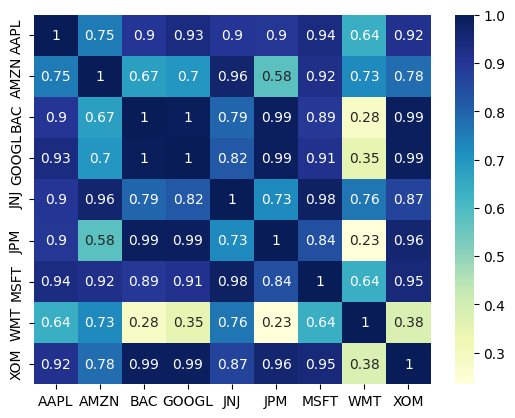

In [ ]:
## Your question 1 answer here for the second heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap( corr_df2, annot = True, cmap="YlGnBu")
plt.show()

### Question 3: Reading correlation heatmaps

The two heatmaps now enable anyone to quickly understand changes to the correlations before and after the first case of covid-19.

Using the two heatmaps you've created, comment on:

*   The overall change in correlation patterns
*   Whether or not any companies stand out as being more or less independent of all the others
*   What companies exhibit high correlation no matter the time period





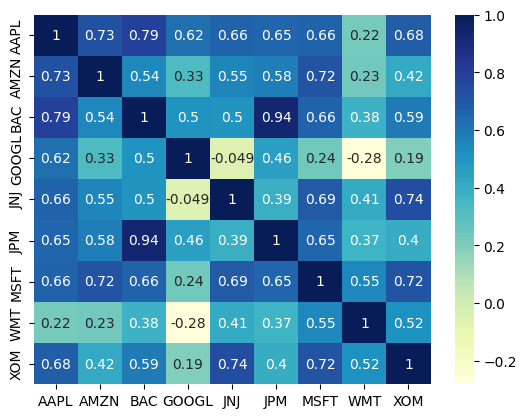

In [ ]:
## Your question 1 answer here for the first heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.heatmap( corr_df1, annot = True, cmap="YlGnBu")
plt.show()

### Question 3 answers:


Your question 3 answer here.


1.   Comparing the two heatmaps, it's clear that the correlation patterns among the listed companies changed between the two time periods. Generally, there seems to be an increase in correlations among the companies after the pandemic onset. This could be attributed to the global economic impact of the pandemic affecting various industries simultaneously.

2.   More Independent: Walmart (WMT) appears to be less correlated with other companies in both periods, as indicated by its relatively lower correlation coefficients. This suggests that Walmart's stock performance might be influenced by factors that are less affected by broader market trends compared to other companies listed.

  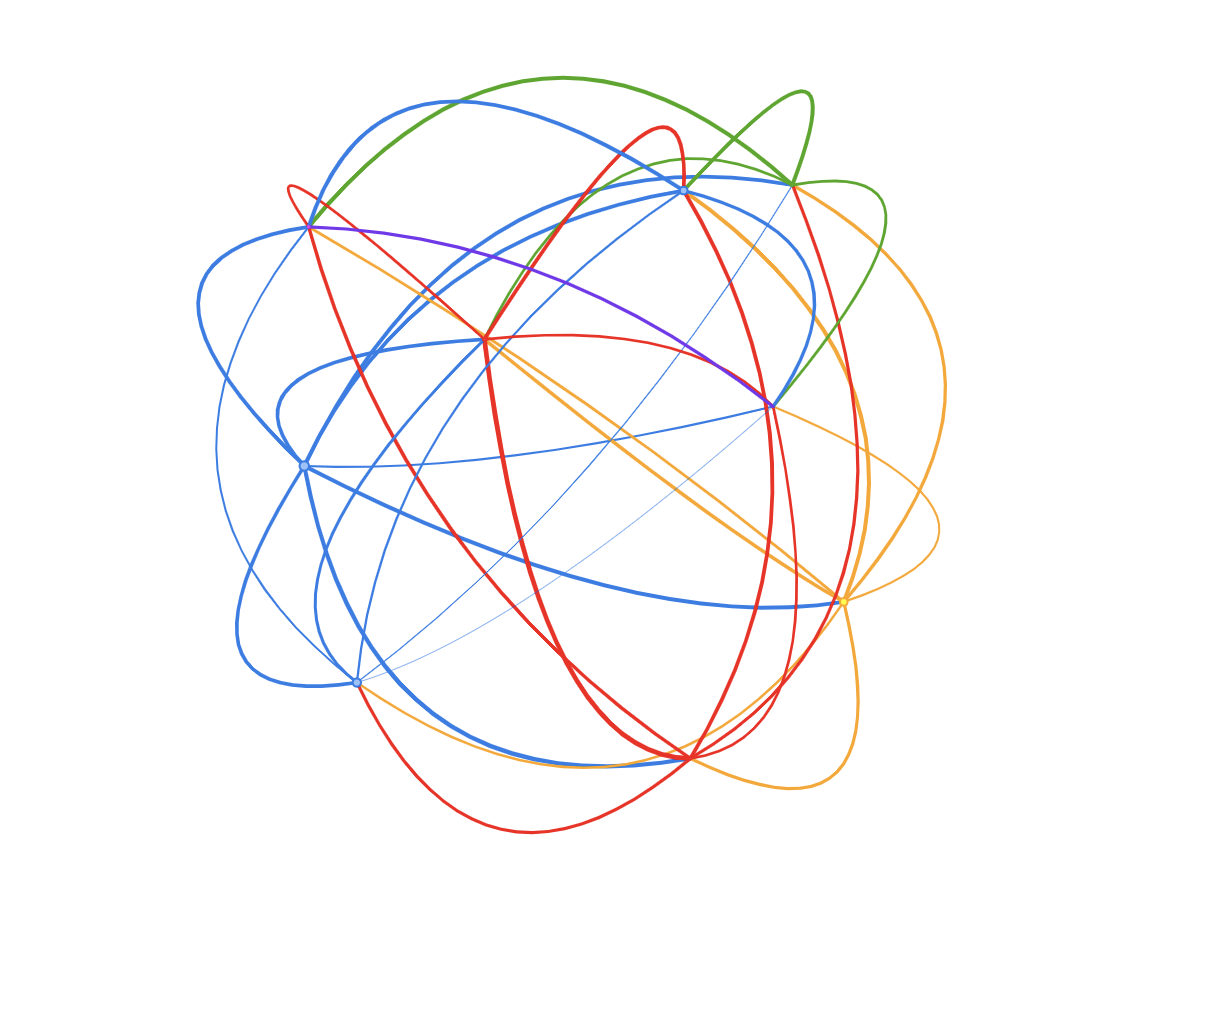Less Independent: In both periods, JPMorgan Chase (JPM) exhibits relatively high correlations with other companies, indicating a stronger connection to market trends. This is particularly noticeable in the post-COVID heatmap, where the correlations have generally increased.


3.   Post-COVID-19: The overall correlation has increased, and certain technology companies, such as Amazon (AMZN) and Microsoft (MSFT), show higher correlations with several other companies. This could be attributed to the increased reliance on technology and e-commerce during the pandemic.






## Network analysis

Now let us view the correlation structure as a network. By representing the correlations as links between company nodes, the graph should reveal another way at looking at structure and anomalies.


### Question 4: Creating network graphs
* Create a network graph for each correlation matrix you created above.
* Use the code example as a template. The code already:
  * Colors each node by its sector
  * Sets the weight of each edge by its correlation
  * Eliminates the self loops which are the correlations of each stock with itself.
* Try to create views of the network which shows the relationship structure between sectors and stocks by playing with the:
  * layout
  * node and edge attributes
  * filtering the graph itself using networkx to take advantage of the graph structure.
Once you have a good view of the network completed, screenshot the view and insert it into the colab notebook.

You may want to refer to the [documentation](https://networkx.github.io/documentation/stable/tutorial.html) for networkx and for [pyvis](https://pyvis.readthedocs.io/en/latest/).

Note that to view the graph, you need to:
* open the folder view on the left hand side
* browse to the html file you generated and download it
* open it with the browser.
* now you can adjust the graph attributes directly

In [ ]:
# Example code to help you with the question

from pyvis.network import Network
import networkx as nx

# Get the tickers off the correlation matrix
stocks1 = corr_df1.index.values
cor_matrix1 = np.asmatrix(corr_df1)

# Create a networkx graph from the correlation matrix
G1 = nx.from_numpy_array(cor_matrix1, create_using=nx.MultiGraph)

#relabels the nodes to match the  stocks names
G1 = nx.relabel_nodes(G1, lambda x: stocks1[x])

#shows the edges with their corresponding weights
G1.edges(data=True)

# This is a bit hacky, but convert the network back to an edgelist so we can process it
edgelist1 = nx.to_pandas_edgelist(G1)
edgelist1.drop_duplicates(keep = False, inplace = True)
edgelist1 = edgelist1[edgelist1.weight != 1.0]

# Now we loop through the edgelist to add the nodes and edges to the network

t_min = top20["Market Cap"].min()
t_max = top20["Market Cap"].max()

normed_mktcap = (top20["Market Cap"]-t_min)/(t_max - t_min)*15
top20["NormedMktCap"] = normed_mktcap
metadata = top20.loc[top20['Symbol'].isin(stocks1)]
sector_map = top20.Sector.unique().tolist()


g = Network(notebook=True, cdn_resources='in_line')
# set the layout
g.barnes_hut()

for index, row in metadata.iterrows():
  sector_group = sector_map.index(row.Sector)
  g.add_node(row.Symbol, label = row.Symbol, group = sector_group, size = row.NormedMktCap)

for index, row in edgelist1.iterrows():
    src = row.source
    dst = row.target
    w = row.weight
    g.add_edge(src, dst, value=w)


# populate the pyvis network from our networkx instance
g.show_buttons()
g.show("corr.html")

corr.html


In [ ]:
!pip install net

### Question 4 answers
Your correlation network graphs can be inserted here:

First graph:
https://drive.google.com/file/d/1Za8oOLtAX3wpaa9sALXrro3vxS2zc-ky/view?usp=drive_link

Second graph:
https://drive.google.com/file/d/1yQak4sXuU00o1RKXDkaX6UGmDV74U9hd/view?usp=sharing

(**Optional extra:**)
To better "dress" up the network graph, you can also use a program like Gephi (https://gephi.org/) to add additional attributes, aesthetics, filters, and schemes to your graph in order to reveal differences. You need to export the graph first to Gexf format and then open the GraphML file in Gephi.

In [ ]:
# For example:
nx.write_gexf(G1, "/content/sample_data/test.gexf")

#### instructor's comments: Thank you for excellent job